In [40]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import pickle

import matplotlib.pyplot as plt

import fnmatch

In [20]:
#Number of Files in my subdirectories 

# print (len(fnmatch.filter(os.listdir('./images/train/ring/'), '*.png')))

In [21]:
# print (len(fnmatch.filter(os.listdir('./images/train/not_ring/'), '*.png')))

In [22]:
num_samp_train = 875
num_samp_test = 292
batch_size = 32

#Augment Fixed or Forever? 

#Instantiate 
train_datagen = ImageDataGenerator(rotation_range = 30,
                                   rescale=1./255)
                                   
test_datagen = ImageDataGenerator(rotation_range=30,
                                  rescale=1./255)

#Fit that class...
train_generator = train_datagen.flow_from_directory(directory='./images/train/',
                                                        target_size=(300, 300),
                                                        color_mode="grayscale",
                                                        batch_size=batch_size,
                                                        shuffle=True,
                                                        save_to_dir = '/Users/patrickcavins/Desktop/augment/',
                                                        save_format = '.png',
                                                        class_mode="binary")


Found 875 images belonging to 2 classes.


In [23]:
validation_generator = test_datagen.flow_from_directory(directory='./images/test/',
                                                        target_size=(300, 300),
                                                        color_mode="grayscale",
                                                        batch_size=batch_size,
                                                        shuffle=True,
                                                        save_to_dir = '/Users/patrickcavins/Desktop/augment/',
                                                        save_format = '.png',
                                                        class_mode="binary")

Found 292 images belonging to 2 classes.


In [24]:
model = Sequential()

#add more layers/filter because of image

model.add(Conv2D(128, (3, 3), input_shape=(300, 300, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3))) #should I increase? It should learn more complicated relations 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3))) #Same thing here... maybe 32,64, 128... 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [25]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # 50% 
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [26]:
#Summary 

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 128)     1280      
_________________________________________________________________
activation_6 (Activation)    (None, 298, 298, 128)     0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 128)     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 147, 147, 64)      73792     
_________________________________________________________________
activation_7 (Activation)    (None, 147, 147, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 64)        36928     
__________

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
##EarlyStopping 

In [30]:
history = model.fit_generator(train_generator, steps_per_epoch= 10, 
                              epochs=30, validation_data=validation_generator, 
                                  validation_steps = 10
                            
                                )

Epoch 1/30
10/10 [==============================] - 116s 12s/step - loss: 0.6631 - acc: 0.6594 - val_loss: 0.6770 - val_acc: 0.5925
Epoch 2/30
10/10 [==============================] - 125s 13s/step - loss: 0.6903 - acc: 0.5594 - val_loss: 0.6821 - val_acc: 0.6404
Epoch 3/30
10/10 [==============================] - 116s 12s/step - loss: 0.6775 - acc: 0.5978 - val_loss: 0.6910 - val_acc: 0.6130
Epoch 4/30
10/10 [==============================] - 122s 12s/step - loss: 0.6557 - acc: 0.6344 - val_loss: 0.6705 - val_acc: 0.6233
Epoch 5/30
10/10 [==============================] - 121s 12s/step - loss: 0.6732 - acc: 0.6188 - val_loss: 0.6559 - val_acc: 0.6541
Epoch 6/30
10/10 [==============================] - 114s 11s/step - loss: 0.6689 - acc: 0.6126 - val_loss: 0.6662 - val_acc: 0.6199
Epoch 7/30
10/10 [==============================] - 124s 12s/step - loss: 0.6436 - acc: 0.6500 - val_loss: 0.6653 - val_acc: 0.6027
Epoch 8/30
10/10 [==============================] - 105s 11s/step - loss: 0.

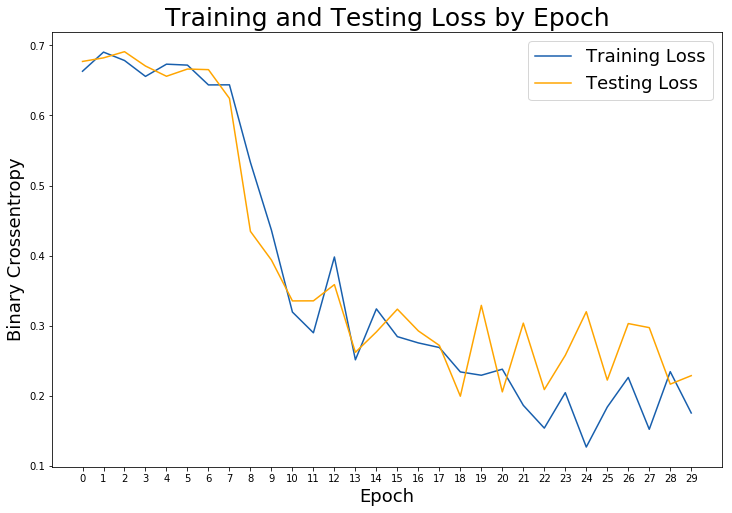

In [32]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks(range(30))

plt.legend(fontsize = 18);

In [33]:
#Testing 
metric = model.evaluate_generator(validation_generator, steps=10, verbose=1)

10/10 [==============================] - 22s 2s/step


In [34]:
labels = model.metrics_names


# Show model performance.
print(f'{labels[0]}: {metric[0]}')
print(f'{labels[1]}: {metric[1]}')

loss: 0.23323067981902867
acc: 0.9315068493150684


In [35]:
preds  = model.predict_generator(validation_generator, steps=10, verbose=1)

10/10 [==============================] - 25s 2s/step


In [37]:
## pickle / look @ keras in house for saving the data 

pred_class = (preds >= .5).astype(int)

In [1]:
pred_class

NameError: name 'pred_class' is not defined

In [42]:
#Using Pickle 

pickle.dump( preds, open( "./data/preds_binary_30epoch.p", "wb" ))
pickle.dump( pred_class, open("./data/pred_class_label_30epoch.p", "wb"))

In [44]:
# favorite_color = pickle.load( open( "save.p", "rb" ) )

x  = pickle.load(open('./data/pred_class_label_30epoch.p', 'rb'))

print (x)

[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]


In [27]:
# model.summary()

In [10]:
# model = tf.keras.Sequential()

# # Must define the input shape in the first layer of the neural network
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
# model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Dropout(0.3))

# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Dropout(0.3))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))

# # Take a look at the model summary
# model.summary()